In [320]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.misc import derivative
#new stuff 7/9 for automating process
import os
import os.path
from pathlib2 import Path
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.weight':'medium', 
         'xtick.major.size':8,
         'ytick.major.size':8}
pylab.rcParams.update(params)


black = '#000000'
yellow = '#F0F442'
orange = '#ec7f31'
#gold = '#E69F00'
gold = '#f0bd24'
green = '#009E73'
dblue = '#0072B2'
lblue = '#56B4E9'
pink = '#F6BBCA'
red = '#FF3442'
purple = '#4f0069'
lgreen = '#00ff99'
c = [purple, red, orange, gold, yellow, green, lgreen, dblue, lblue, pink]





bl = '#0000ff'
pu = '#8c1aff'
bg = '#00cc66'
cy = '#00ccff'
pi = '#ff66ff'
re = '#990033'
ora = '#ff704d'
ye = '#ffff66'
gr = '#99ff99'
pal = [bl, pu, bg, cy, pi, re, ora, ye, gr]

[ 1.         -6.85721269]


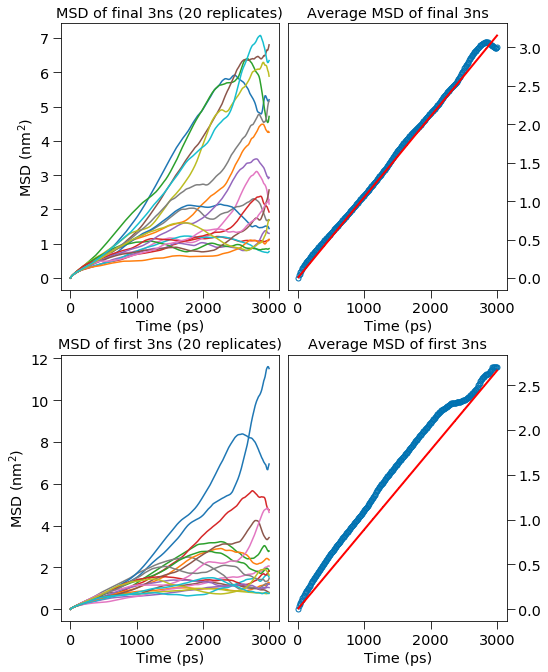

In [300]:
plt.figure(figsize=(8, 11))
grid = plt.GridSpec(11, 8)
plt.subplot(grid[:5,:4])
fit = []
m = np.zeros(301)
plt.title('MSD of final 3ns (20 replicates)')
for i in range(1, 10):
    data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19_dif/SA20-0'+str(i)+'_3ns_msd.xvg', skip_header=20)
    m+=data[:,1]
    plt.errorbar(data[:,0], data[:,1])
    fit.append(np.polyfit(data[:,0],data[:,1],1)[0])
    
for i in range(10, 21):
    data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20_dif/SA20-'+str(i)+'_3ns_msd.xvg', skip_header=20)
    m+=data[:,1]
    plt.errorbar(data[:,0], data[:,1])
    fit.append(np.polyfit(data[:,0],data[:,1],1)[0])

#print(m)
mn = m/20
y = np.mean(fit)
e = np.std(fit)
x = np.arange(10,3010,10)
plt.xlabel('Time (ps)')
plt.ylabel('MSD (nm$^2$)')
ax= np.log(x)
ay = np.log(y*x)
p = np.polyfit(ax, ay, 1)
print(p)


#plt.yticks([])
#plt.ylim(0,12)
#print(y)
#print(len(x))
#print(len(mn))
plt.subplot(grid[:5, 4:])
m = np.zeros(301)
plt.title('Average MSD of final 3ns')
#plt.ylabel('MSD (nm$^2$)')
plt.tick_params(left='off', right='on', labelleft='off', labelright='on')
plt.errorbar(x, mn[:-1], fmt='o', ms=5, fillstyle='none', color=c[7])
plt.errorbar(x, y*x, yerr=e, c='r', ecolor='grey', lw=2)
#plt.ylim(0,12)
#print(y)
plt.xlabel('Time (ps)')






plt.subplot(grid[6:11,:4])
plt.title('MSD of first 3ns (20 replicates)')
plt.xlabel('Time (ps)')
fit = []
m = np.zeros(301)
for i in range(21, 41):
    data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20_dif/SA20-'+str(i)+'_3ns_msd.xvg', skip_header=20)
    plt.errorbar(data[:,0], data[:,1])
    p = np.polyfit(data[:,0],data[:,1], 1)
    m+=data[:,1]
    #print(p[0])
    fit.append(p[0])
    #print(np.mean(fit))
plt.ylabel('MSD (nm$^2$)')   
    
mn = m/20
y = np.mean(fit)
e = np.std(fit)
y = np.mean(fit)
x = np.arange(10,3010,10)

plt.subplot(grid[6:11, 4:])
plt.xlabel('Time (ps)')
m = np.zeros(301)
plt.title('Average MSD of first 3ns')

plt.tick_params(left='off', right='on', labelleft='off', labelright='on')
plt.errorbar(x, mn[:-1], fmt='o', ms=5, fillstyle='none', color=c[7])
plt.errorbar(x, y*x, yerr=e, c='r', ecolor='grey', lw=2)

#print(y)

plt.savefig('/home/adommer/Desktop/ensemble_avg_msd.png', dpi=300)

In [298]:
ax= np.log(x)
ay = np.log(y*x)
p = np.polyfit(ax, ay, 1)
print(p)

[ 1.         -7.02638964]


In [98]:
data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/step9_1_PALP_xyzmsd1.xvg', skip_header=17)
#print(data)

## MIX1, NaCl0.4, SA20, pH2

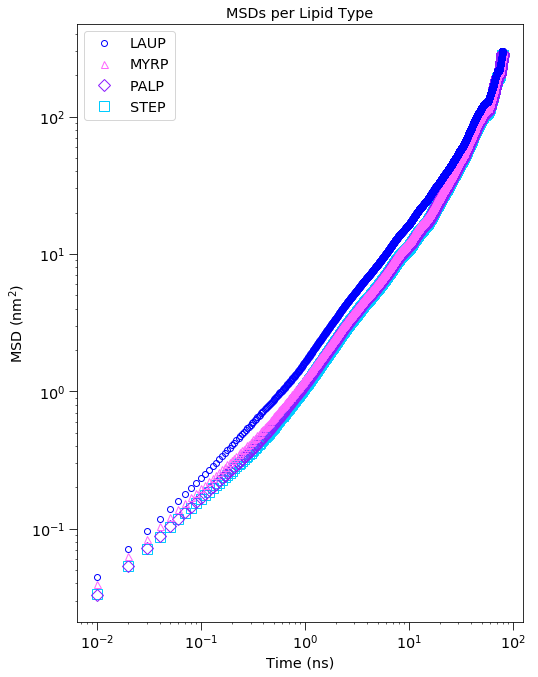

In [358]:
plt.figure(figsize=(8, 11))
#grid = plt.GridSpec(5, 8)
#plt.subplot(grid(:))
#plt.subplot(211)
plt.title('MSDs per Lipid Type')
######LAUP####
f = []
m = np.zeros(8001)
for i in range(253,288):
    q = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/molecular_diffusion/msd'+str(i)+'.xvg', skip_header=20)
    #plt.loglog(q[:,0]/1000, q[:,1], marker='o', ms=10,fillstyle='none', ls='none', c=c[1])
    f.append(np.polyfit(q[:,0]/1000, q[:,1],1)[0])
    m = m+q[:,1]
plt.loglog(np.arange(0,80.01,0.01), (m/34), marker='o', ms=6, fillstyle='none', ls='none',c=pal[0],  label='LAUP', zorder=4)
yl = np.mean(f)
dL =[]
for i in np.arange(0,8000,500):
    dL.append(np.gradient(m/34)[i]) 


######MYRP#######

f=[]
m = np.zeros(8001)
for i in range(288,361):
    q = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/molecular_diffusion/msd'+str(i)+'.xvg', skip_header=20)
    #plt.loglog(q[:,0]/1000, q[:,1], marker='o', ms=10,fillstyle='none', ls='none', c=c[7])
    f.append(np.polyfit(q[:,0]/1000, q[:,1],1)[0])
    m = m+q[:,1]
plt.loglog(np.arange(0,80.01,0.01), (m/72), marker='^', ms=7, fillstyle='none', ls='none', c=pal[4], label='MYRP', zorder=3)
ym = np.mean(f)
dM = []
for i in np.arange(0,8000,500):
    dM.append(np.gradient(m/72)[i])    



#####palp#######
f = []
m = np.zeros(8001)
for i in range(1,145):
    q = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/molecular_diffusion/msd'+str(i)+'.xvg', skip_header=20)
    #plt.loglog(q[:,0]/1000, q[:,1], marker='o', ms=10,fillstyle='none', ls='none', c=c[0])
    f.append(np.polyfit(q[:,0]/1000, q[:,1],1)[0])
    m = m+q[:,1]
#print(m/144)
plt.loglog(np.arange(0,80.01,0.01), (m/144), marker='D', ms=8, fillstyle='none', ls='none', c=pal[1], label='PALP', zorder=2)
dP = []
for i in np.arange(0,8000,500):
    dP.append(np.gradient(m/144)[i])    
yp = np.mean(f)
xp = np.arange(0, 80, 0.01)




######STEP########
m = np.zeros(8001)
f = []
for i in range(145,253):
    q = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/molecular_diffusion/msd'+str(i)+'.xvg', skip_header=20)
    f.append(np.polyfit(q[:,0]/1000, q[:,1],1)[0])
    m = m+q[:,1]
ys = np.mean(f)
plt.loglog(np.arange(0,80.01,0.01), (m/108), marker='s', ms=10, fillstyle='none', ls='none', c=pal[3], label='STEP', zorder=1)
dS = []
for i in np.arange(0,8000,500):
    dS.append(np.gradient(m/108)[i])  
#plt.plot(np.arange(0.0,1, 0.01),0.000888132475519*np.arange(.01,, 0.01), c='k',ls='dashed',lw=3, zorder=5, label='1.00')
plt.legend(loc=2)   
plt.ylabel('MSD (nm$^2$)')
plt.xlabel('Time (ns)')
plt.savefig('/home/adommer/Desktop/MSDperLip.png',dpi=300)


#plt.subplot(212)
#plt.title('Diffusion Constants per Lipid Type')
n = np.arange(0,8000,500)
#plt.errorbar(n, dL, c='#ff4da6',ls='none', marker='o', ms=7,label='LAUP', zorder=4)
#plt.errorbar(n, dM, c='#00ffff',ls='none', marker='^', ms=7,label='MYRP', zorder=3)
#plt.errorbar(n, dP, c=c[0],ls='none', marker='D', label='PALP',ms=7,zorder=2)
#plt.errorbar(n, dS, c='#ff6600',ls='none', marker='s', label='STEP',ms=7,zorder=1)

#plt.legend(loc=2)
#plt.xlabel('Time(ns)')
#plt.ylabel('Diffusion Constant per Lipid Type (Nnm/S$^2$)')


<Container object of 3 artists>

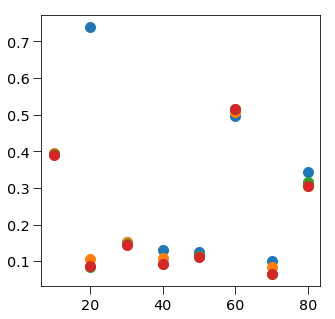

In [318]:
LAUP_avgs = []
for i in range(1,9):
    data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/concat_LAUP_dc'+str(i)+'.xvg', skip_header=17)
    LAUP_avgs.append(np.mean(data[:,1]))
#LAUP_avgs.append(data[:,0])

MYRP_avgs = []
for i in range(1,9):
    data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/concat_MYRP_dc'+str(i)+'.xvg', skip_header=17)
    MYRP_avgs.append(np.mean(data[:,1]))
#MYRP_avgs.append(data[:,0])


PALP_avgs = []
for i in range(1,9):
    data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/concat_PALP_dc'+str(i)+'.xvg', skip_header=17)
    PALP_avgs.append(np.mean(data[:,1]))
#PALP_avgs.append(data[:,0])


STEP_avgs = []
for i in range(1,9):
    data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/concat_STEP_dc'+str(i)+'.xvg', skip_header=17)
    STEP_avgs.append(np.mean(data[:,1]))
#STEP_avgs.append(data[:,0])

plt.figure(figsize=(5,5))
x = np.arange(10, 90, 10)
plt.errorbar(x, LAUP_avgs, label='LAUP', fmt='o', ms=10)
plt.errorbar(x, MYRP_avgs, label='MYRP', fmt='o', ms=10)
plt.errorbar(x, PALP_avgs, label='PALP', fmt='o', ms=10)
plt.errorbar(x, STEP_avgs, label='STEP', fmt='o', ms=10)


## MIX1 NaCl0.4 SA19.5 pH2

In [319]:
traj = md.load('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19.5_100ns/step9_1.trr', top='/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19.5_100ns/step9_1.gro')
print(traj)
print(len(traj.top.select('resname LAUP or resname PALP or resname MYRP or resname STEP')))

<mdtraj.Trajectory with 2001 frames, 48540 atoms, 7900 residues, and unitcells>


In [329]:
sel = traj.top.select('resname LAUP or resname PALP or resname MYRP or resname STEP')
ntraj = traj.atom_slice(sel)
print(ntraj)
print(ntraj[-1])

<mdtraj.Trajectory with 2001 frames, 18772 atoms, 380 residues, and unitcells>
<mdtraj.Trajectory with 1 frames, 18772 atoms, 380 residues, and unitcells>


In [333]:
traj = ntraj[-1]
tra = traj.atom_slice(traj.top.select('resname MYRP'))
print(tra)
#153 PALP
#38 LAUP
#114 STEP
#76 MYRP

<mdtraj.Trajectory with 1 frames, 3344 atoms, 76 residues, and unitcells>


In [ ]:
plt.figure(figsize=(8, 11))
#grid = plt.GridSpec(5, 8)
#plt.subplot(grid(:))
#plt.subplot(211)
plt.title('MSDs per Lipid Type')
######LAUP####
f = []
m = np.zeros(8001)
for i in range(253,288):
    q = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-/msd'+str(i)+'.xvg', skip_header=20)
    #plt.loglog(q[:,0]/1000, q[:,1], marker='o', ms=10,fillstyle='none', ls='none', c=c[1])
    f.append(np.polyfit(q[:,0]/1000, q[:,1],1)[0])
    m = m+q[:,1]
plt.loglog(np.arange(0,80.01,0.01), (m/34), marker='o', ms=6, fillstyle='none', ls='none',c='#ff4da6',  label='LAUP', zorder=4)
yl = np.mean(f)
dL =[]
for i in np.arange(0,8000,500):
    dL.append(np.gradient(m/34)[i]) 


######MYRP#######

f=[]
m = np.zeros(8001)
for i in range(288,361):
    q = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/molecular_diffusion/msd'+str(i)+'.xvg', skip_header=20)
    #plt.loglog(q[:,0]/1000, q[:,1], marker='o', ms=10,fillstyle='none', ls='none', c=c[7])
    f.append(np.polyfit(q[:,0]/1000, q[:,1],1)[0])
    m = m+q[:,1]
plt.loglog(np.arange(0,80.01,0.01), (m/72), marker='^', ms=7, fillstyle='none', ls='none', c='#00ffff', label='MYRP', zorder=3)
ym = np.mean(f)
dM = []
for i in np.arange(0,8000,500):
    dM.append(np.gradient(m/72)[i])    



#####palp#######
f = []
m = np.zeros(8001)
for i in range(1,153):
    q = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/molecular_diffusion/msd'+str(i)+'.xvg', skip_header=20)
    #plt.loglog(q[:,0]/1000, q[:,1], marker='o', ms=10,fillstyle='none', ls='none', c=c[0])
    f.append(np.polyfit(q[:,0]/1000, q[:,1],1)[0])
    m = m+q[:,1]
#print(m/144)
plt.loglog(np.arange(0,80.01,0.01), (m/144), marker='D', ms=8, fillstyle='none', ls='none', c=c[0], label='PALP', zorder=2)
dP = []
for i in np.arange(0,8000,500):
    dP.append(np.gradient(m/144)[i])    
yp = np.mean(f)
xp = np.arange(0, 80, 0.01)




######STEP########
m = np.zeros(8001)
f = []
for i in range(145,253):
    q = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/molecular_diffusion/msd'+str(i)+'.xvg', skip_header=20)
    f.append(np.polyfit(q[:,0]/1000, q[:,1],1)[0])
    m = m+q[:,1]
ys = np.mean(f)
plt.loglog(np.arange(0,80.01,0.01), (m/108), marker='s', ms=9, fillstyle='none', ls='none', c='#ff6600', label='STEP', zorder=1)
dS = []
for i in np.arange(0,8000,500):
    dS.append(np.gradient(m/108)[i])  
#plt.plot(np.arange(0.0,1, 0.01),0.000888132475519*np.arange(.01,, 0.01), c='k',ls='dashed',lw=3, zorder=5, label='1.00')
plt.legend(loc=2)   
plt.ylabel('MSD (nm$^2$)')
plt.xlabel('Time (ns)')
plt.savefig('/home/adommer/Desktop/MSDperLip.png',dpi=300)


#plt.subplot(212)
#plt.title('Diffusion Constants per Lipid Type')
n = np.arange(0,8000,500)
#plt.errorbar(n, dL, c='#ff4da6',ls='none', marker='o', ms=7,label='LAUP', zorder=4)
#plt.errorbar(n, dM, c='#00ffff',ls='none', marker='^', ms=7,label='MYRP', zorder=3)
#plt.errorbar(n, dP, c=c[0],ls='none', marker='D', label='PALP',ms=7,zorder=2)
#plt.errorbar(n, dS, c='#ff6600',ls='none', marker='s', label='STEP',ms=7,zorder=1)

#plt.legend(loc=2)
#plt.xlabel('Time(ns)')
#plt.ylabel('Diffusion Constant per Lipid Type (Nnm/S$^2$)')


10001


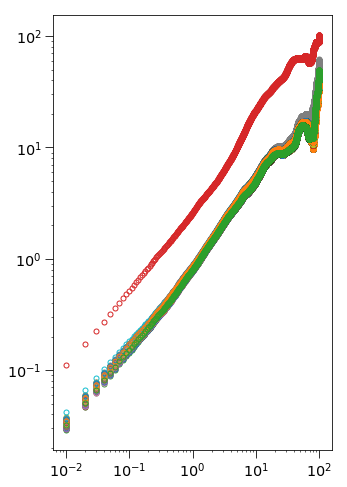

In [361]:
f = []
plt.figure(figsize=(5,8))
m = np.zeros(10001)
for i in range(1,154):
    q = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19.5_100ns/molecular_diffusion/msd'+str(i)+'.xvg', skip_header=20)
    plt.loglog(q[:,0]/1000, q[:,1], marker='o', ms=5,fillstyle='none', ls='none')
    #print(len(q[0]))
print(len(q[:,0]))
    #f.append(np.polyfit(q[:,0]/1000, q[:,1],1)[0])
    #m = m+q[:,1]
#print(m/144)
#plt.loglog(np.arange(0,80.01,0.01), (m/144), marker='D', ms=8, fillstyle='none', ls='none', c=c[0], label='PALP', zorder=2)
dP = []
#for i in np.arange(0,8000,500):
    #dP.append(np.gradient(m/144)[i])    
#yp = np.mean(f)
#xp = np.arange(0, 80, 0.01)

In [349]:
traj = md.load('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_01.trr', top='/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_1.gro')
print(traj)
print(len(traj.top.select('resname LAUP or resname PALP or resname MYRP or resname STEP')))

<mdtraj.Trajectory with 1001 frames, 47628 atoms, 7669 residues, and unitcells>
18772


In [350]:
sel = traj.top.select('resname LAUP or resname PALP or resname MYRP or resname STEP')
ntraj = traj.atom_slice(sel)
print(ntraj)
print(ntraj[-1])


<mdtraj.Trajectory with 1001 frames, 18772 atoms, 380 residues, and unitcells>
<mdtraj.Trajectory with 1 frames, 18772 atoms, 380 residues, and unitcells>


In [354]:
traj = ntraj[-1]
tra = traj.atom_slice(traj.top.select('resname STEP'))
print(tra)
#MYRP 76
#PALP 152
#LAUP 38
#STEP114

<mdtraj.Trajectory with 1 frames, 6384 atoms, 114 residues, and unitcells>
